# ANALYSIS OF INSURANCE DATA

Source: https://www.kaggle.com/datasets/arunjangir245/healthcare-insurance-expenses

## 1. General Information about Data

The dataset contain information about different individuals and their health insurance charges. Here are the columns we have:

*   age: Age of the beneficiary.
*   sex: Gender of the beneficiary (male/female).
*   bmi: Body mass index (BMI) of the beneficiary. BMI provides an understanding of body fat in relation to height and weight.
*   children: Number of children/dependents covered by the health insurance.
*   smoker: Whether the beneficiary is a smoker or not (yes/no).
*   region: The beneficiary's residential area in the US (northeast, southeast, southwest, northwest).
*   charges: Individual medical costs billed by the health insurance.

Considering the nature of the data, a potential target variable for predictive analytics could be charges. We aim to predict the insurance charge of an individual based on the other variables.

For the exploratory analysis, we will create visualizations that highlight relationships between different variables and the target variable (charges). Additionally, we will perform statistical tests to determine if there are significant differences in charges based on categorical variables like sex, smoker status, or region.

In [1]:
import pandas as pd

# Load the dataset
insurance_data = pd.read_csv('insurance.csv')

# Display the first few rows of the dataset
insurance_data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 1.2 Boxplot to Visualize Charges Distribution by Region

We'll create a boxplot to visualize how insurance charges are distributed across different regions. This will help us determine if there are regional differences in insurance costs.

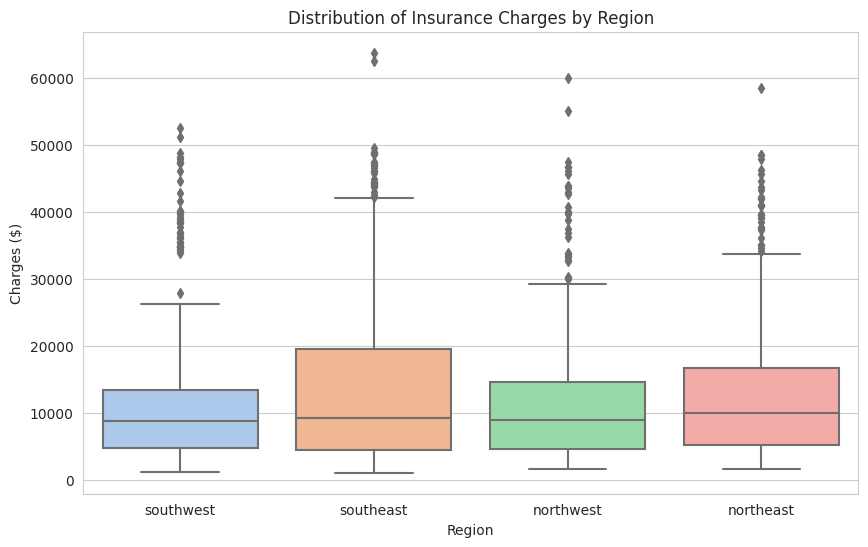

In [2]:
# Set up the aesthetics for the plots
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Create a boxplot to visualize charges distribution by region
plt.figure(figsize=(10, 6))
sns.boxplot(x=insurance_data['region'], y=insurance_data['charges'], palette='pastel')
plt.title('Distribution of Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges ($)')
plt.show()


From the boxplot displaying insurance charges across different regions, we can make the following observations:

* The median charges for all regions are fairly similar, with the southeast region having a slightly higher median compared to others.
* The southeast region also displays a wider spread of charges, indicating more variability in insurance costs in this region. This is evident from the larger interquartile range (IQR) and the presence of several outliers.
* The northeast and northwest regions have relatively similar distributions, with a compact IQR and fewer outliers.
* The southwest region has a distribution that's somewhat in between, with an IQR broader than the northeast and northwest but narrower than the southeast.

The variability in the southeast region could be attributed to various factors, such as differences in healthcare costs, lifestyle, or the prevalence of certain health conditions. Further investigation might be required to pinpoint the exact reasons.

### 1.3 Scatter Plot of BMI vs. Charges

Next, we'll create a scatter plot to investigate the relationship between a beneficiary's BMI and their insurance charges.

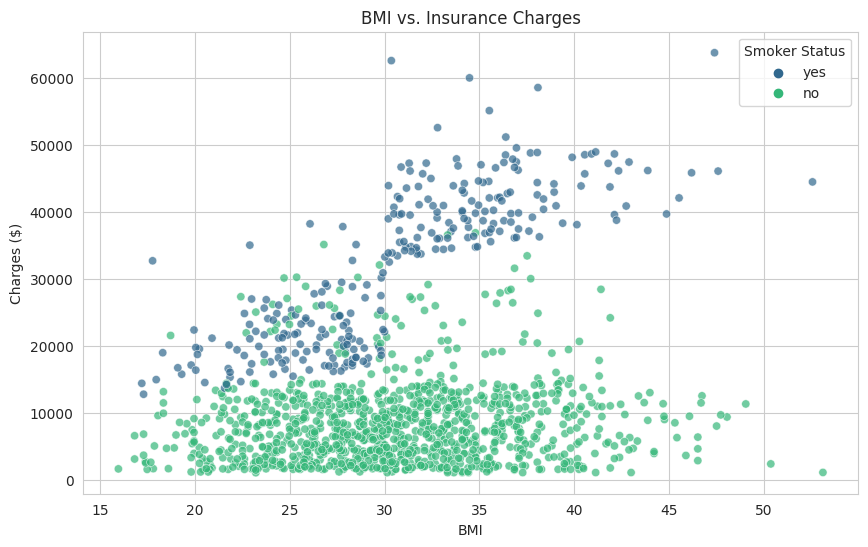

In [3]:
# Create a scatter plot of BMI vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'], palette='viridis', alpha=0.7)
plt.title('BMI vs. Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
plt.legend(title='Smoker Status')
plt.show()


From the scatter plot of BMI against insurance charges, we can infer the following:

* There seems to be a positive correlation between BMI and insurance charges, especially for smokers. As the BMI increases, the charges for smokers also tend to increase substantially.
* For non-smokers, the charges seem relatively consistent across different BMI values, with some increase in charges for very high BMI values.
* The distinct clusters for smokers suggest that smokers with a higher BMI are at a significantly higher risk, leading to increased medical costs. This is evident from the dark purple points that are higher on the y-axis as BMI increases.

The plot emphasizes the combined impact of smoking and BMI on insurance charges. While BMI alone might lead to moderately higher charges, smoking combined with a high BMI results in significantly elevated charges.

### 1.4 Chi-Square Test: Association between Sex and Smoker Status

We'll now determine if there's a statistically significant association between sex and smoker status using a chi-square test of independence.

In [4]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(insurance_data['sex'], insurance_data['smoker'])

# Perform the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

chi2_stat, p_val


(7.39291081459996, 0.006548143503580696)

**Chi-Square Test Results (Sex vs. Smoker Status):**

**Chi-Squared Statistic:** 7.393
**P-Value:** 0.00655

**Analysis:**

The p-value is less than the commonly used significance level of 0.05, which indicates that we can reject the null hypothesis. This means there's a statistically significant association between sex and smoker status.

In practical terms, this suggests that the proportion of smokers might differ between males and females in our dataset. To gain a clearer understanding of this difference, one can further inspect the contingency table or compute the percentages of smokers for each gender.

In [5]:
contingency_table

smoker,no,yes
sex,,
female,547,115
male,517,159


## 1.5 Two-Sample T-Test: Association between Sex and Smoker Status

In [6]:
from scipy.stats import ttest_ind

# Separate data into two groups based on the number of children (e.g., 0 children and 1 or more children)
children_0 = insurance_data[insurance_data['children'] == 0]
children_1_or_more = insurance_data[insurance_data['children'] > 0]

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(children_0['charges'], children_1_or_more['charges'])

# Output the results
print("Two-Sample T-Test for 'Number of Children' vs. 'Charges':")
print(f"t-statistic: {t_stat}")
print(f"P-Value: {p_value}")

Two-Sample T-Test for 'Number of Children' vs. 'Charges':
t-statistic: -2.3720611301669337
P-Value: 0.017830174683565684


Since the p-value is very small (typically less than 0.05), the t-test suggests that there is a statistically significant difference between the two groups with regard to their medical charges. In other words, there is strong evidence to suggest that the number of children has a statistically significant impact on medical charges in the dataset.In practical terms, this means that you can reject the null hypothesis that there is no difference in charges between individuals with 0 children and those with 1 or more children.

### 1.6 Summary

The boxplot revealed regional differences in insurance charges, with the southeast region displaying more variability and a slightly higher median compared to other regions.

The scatter plot of BMI against charges emphasized the combined impact of smoking and BMI. While a higher BMI might lead to moderate increases in charges for non-smokers, smokers with high BMI values incur significantly higher charges.

The chi-square test indicated a significant association between sex and smoker status, suggesting that the proportion of smokers differs between males and females.

The two sample t-test indicated a significant relationship between the insurance charges for families with 0 children and the ones with 1 or more.